<a href="https://colab.research.google.com/github/juanalistapablo/FLor_Iris_Modelo_MLP/blob/main/Classificando_Clientes_de_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MENSURAÇAO DE DADOS



In [ ]:
import pandas as pd

visualizar esse dataframe :

In [ ]:
dados = pd.read_csv('/content/marketing_investimento.csv')
dados#visulisaçao limitada da base de dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB




### Variáveis categóricas

variavel alvo :

1- relaçao com outras variaveis

2- intende o comportamento

3 - prever comportamento

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [ ]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [ ]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

# Tratamento de dados




## Variáveis explicativas e variável alvo

In [ ]:
x = dados.drop('aderencia_investimento', axis = 1)# armazenar as variaveis explicativas na variavel x
y = dados['aderencia_investimento']

## Tratando os Dados das Variáveis Explicativas


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
colunas = x.columns

In [ ]:
#tupla(coluna x one hot)
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),#logica binaria aplicada as variaves
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),# as variaves escolhidas
    remainder = 'passthrough',
    sparse_threshold=0) # mante os 0

In [ ]:
x = one_hot.fit_transform(x)# armazenar nas varives explicativas

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

valor sim =1 , valor nao = 0

In [ ]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando a variável alvo

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_ecoder = LabelEncoder()

In [ ]:
y = label_ecoder.fit_transform(y)# variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# Ajustando modelos

## Dividindo os dados entre treino e teste

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

## Modelo de base

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)#Dummy servira de parametro de acerto para os proximos modelos

0.6025236593059937

## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier#O modelo de árvore de decisão é muito utilizado pela sua alta explicabilidade e processamento rápido

In [ ]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
  nome_colunas = ['casado (a)',
                  'divorciado (a)',
                  'solteiro (a)',
                  'fundamental',
                  'medio',
                  'superior',
                  'inadimplencia',
                  'fez_emprestimo',
                  'idade',
                  'saldo',
                  'tempo_ult_contato',
                  'numero_contatos']

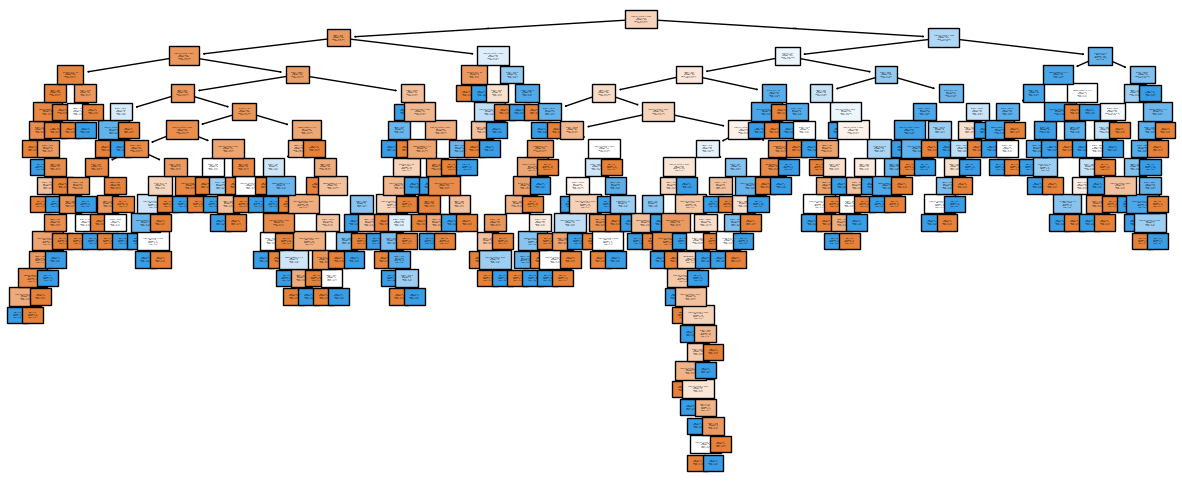

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);#modelos muito complexo podem nao ser eficiente

In [ ]:
arvore.score(x_treino, y_treino)#teste : memorisar X aprender

1.0

##Otimizando Árvore de decisão

In [ ]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Definir os hiperparâmetros a serem otimizados
parametros = {
    'max_depth': (3, 4),         # Intervalo para max_depth (altura da árvore)
    'min_samples_split': (5, 10), # Intervalo para o número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': (5, 10)   # Intervalo para o número mínimo de amostras necessárias em uma folha
}

In [ ]:
# Otimização Bayesiana com BayesSearchCV
opt = BayesSearchCV(arvore, parametros, n_iter=50, cv=5, scoring='accuracy', random_state=5)

In [ ]:
# Treinamento com otimização bayesiana
opt.fit(x_treino, y_treino)

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(3), np.int64(5), np.int64(5)] before, using random point [np.int64(3), np.int64(9), np.int64(6)]

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(4), np.int64(6), np.int64(7)] before, using random point [np.int64(4), np.int64(7), np.int64(5)]

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(4), np.int64(9), np.int64(9)] before, using random point [np.int64(4), np.int64(7), np.int64(7)]

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [np.int64(4), np.int64(7), np.int64(5)] before, using random point [np.int64(3), np.int64(8), np.int64(6)]

/usr/local/lib/python3.11/dist-packages/skopt/op

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
              random_state=5, scoring='accuracy',
              search_spaces={'max_depth': (3, 4), 'min_samples_leaf': (5, 10),
                             'min_samples_split': (5, 10)})

In [ ]:
# Exibir os melhores parâmetros encontrados e o score de validação cruzada
best_params = opt.best_params_
best_score = opt.best_score_

# Exibindo os resultados de maneira mais clara
print("Melhores parâmetros encontrados pela otimização bayesiana:")
for param, value in best_params.items():
    print(f"- {param}: {value}")

print(f"\nAcurácia média da validação cruzada: {best_score * 100:.2f}%")


Melhores parâmetros encontrados pela otimização bayesiana:
- max_depth: 3
- min_samples_leaf: 6
- min_samples_split: 8

Acurácia média da validação cruzada: 74.55%


In [ ]:
arvore.score(x_treino, y_treino)#a arvore nao esta somente memorisando os dados

0.7613038906414301

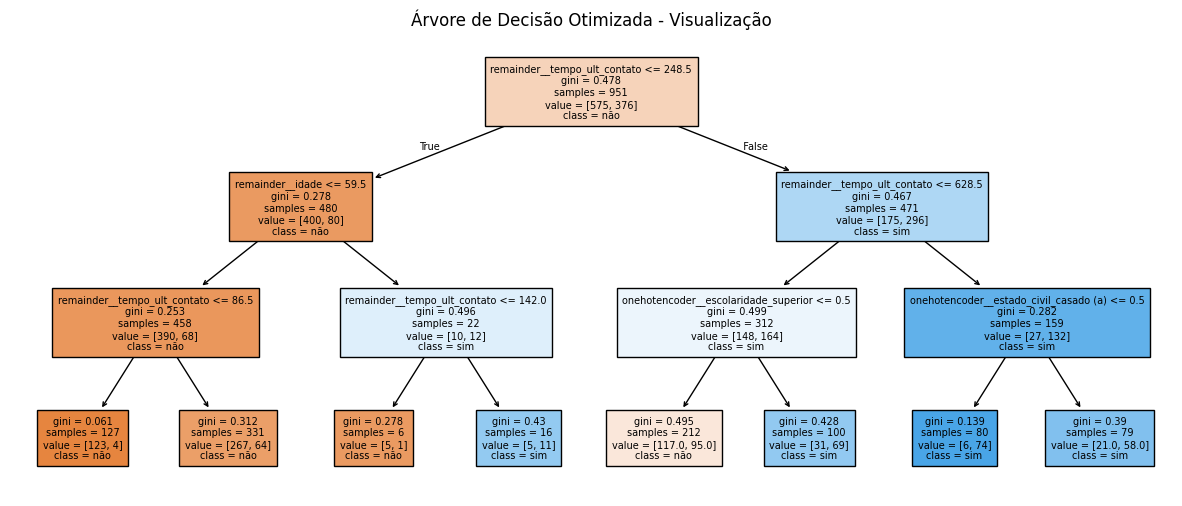

In [ ]:
# Visualizar a árvore de decisão otimizada
plt.figure(figsize=(15, 6))
plot_tree(arvore_otimizada, filled=True, class_names=['não', 'sim'], fontsize=7, feature_names=one_hot.get_feature_names_out(colunas))
plt.title("Árvore de Decisão Otimizada - Visualização")
plt.show()

REDES BAYSIANAS

Uma rede bayesiana é um modelo probabilístico que representa um conjunto de variáveis e suas dependências condicionais por meio de um grafo acíclico direcionado . É usada para modelar incertezas e realizar inferências probabilísticas

IMPACTOS:

1-lucrar em conceguir achar um publico alvo

2- nao precisar gastar com publicidade em um publico com menos chance

3- possiblidade de demanda expecifica

**Ponto forte do código:**


O código não só constrói uma rede bayesiana automaticamente a partir dos dados, como também realiza inferência e avaliação, mostrando como este tipo de modelo pode ser usado tanto para previsão quanto para análise probabilística.

**Melhorias sugeridas**

-Validação cruzada



-Tratamento de valores ausentes



-Verificação da dimensionalidade




-Escalabilidade

